# Finding the Interesting Stars

In the following script, an 'interesting' star is considered to be any star that does not have a companion in WDS, Simbad, Gaia or KOA and that has an astrometric acceleration >= 100 m/s/yr.

In [83]:
# Necessary Modules 
import numpy as np 
import pandas as pd 
from pandas import read_csv as rc
import matplotlib.pyplot as plt

In [86]:
# Opening necessary files containing lists
path = '/Users/Jess/HGCA_survey_paper/'
wds = rc(path + 'wds_values.csv')
simbad = rc(path + 'simbad_data.csv')
gaia = rc(path + 'gaia_companions.csv')
koa = rc(path + 'koas.csv')
accels = rc(path + 'accelerations.csv') 

In [291]:
# Pulling data for whether or not systems contain more than one star 
bool_wds = wds['wds_companions']
bool_gaia = gaia['gaia_comps']
bool_koa = koa['koa_comps']
bool_simbad = simbad['simbad_companions']
acc = accels['acceleration']

In [92]:
# Create a list of which stars have companions in ANY of the surveys
companion = [] # 1 = companion and 0 = no companion

for i in range(len(bool_wds)):
    if bool_wds[i] == 0 and bool_gaia[i] == 0 and bool_koa[i] == 0 and bool_simbad[i] == 0:
        companion.append(0) # no companion
    else: 
        companion.append(1) # companion
        
print('There are ' + str(len(companion)) + ' systems in this survey.')
print('There are ' + str(sum(companion)) + ' systems with companions.')
print('There are ' + str(len(companion)-sum(companion)) + ' systems without companions.')

There are 2453 systems in this survey.
There are 1055 systems with companions.
There are 1398 systems without companions.


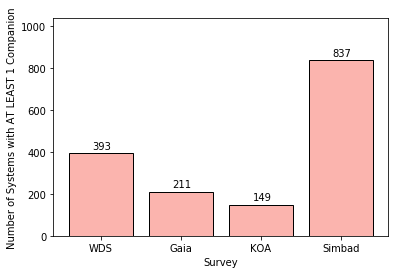

In [187]:
# Create a histogram of how many systems were found to be multiple, in each survey. 
wds_plot = []
gaia_plot = []

for i in bool_wds:
    if i == 0:
        wds_plot.append(0)
    else: 
        wds_plot.append(1)
        
for i in bool_gaia:
    if i == 0:
        gaia_plot.append(0)
    else: 
        gaia_plot.append(1)
        
plt.bar([1, 2, 3, 4], [sum(wds_plot), sum(gaia_plot), sum(bool_koa), sum(bool_simbad)], color='#fbb4ae', edgecolor='black', tick_label=['WDS', 'Gaia', 'KOA', 'Simbad'])
plt.ylim(0, sum(bool_simbad)+200)
plt.xlabel('Survey')
plt.ylabel('Number of Systems with AT LEAST 1 Companion')
plt.text(0.9, sum(wds_plot)+20, str(sum(wds_plot)))
plt.text(1.9, sum(gaia_plot)+20, str(sum(gaia_plot)))
plt.text(2.9, sum(bool_koa)+20, str(sum(bool_koa)))
plt.text(3.9, sum(bool_simbad)+20, str(sum(bool_simbad)))
plt.savefig('/Users/Jess/HGCA_survey_paper/plots/companions_found.png')

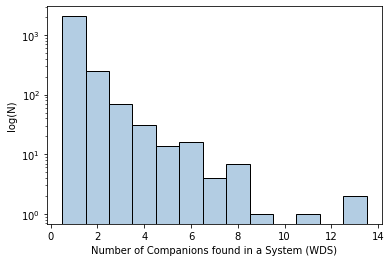

In [286]:
# Create a histogram of the amount of companions found around each star in WDS.
plt.hist(bool_wds, max(bool_wds), histtype='bar', color='#b3cde3', edgecolor='black', align='right')
plt.yscale('log')
plt.ylabel('log(N)')
plt.xlabel('Number of Companions found in a System (WDS)')
plt.savefig('/Users/Jess/HGCA_survey_paper/plots/wds_companions.png')

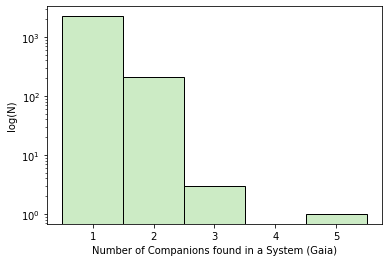

In [287]:
# Create a histogram of the amount of companions found around each star in Gaia.
plt.hist(bool_gaia, max(bool_gaia), histtype='bar', color='#ccebc5', edgecolor='black', align='right')
plt.yscale('log')
plt.ylabel('log(N)')
plt.xlabel('Number of Companions found in a System (Gaia)')
plt.savefig('/Users/Jess/HGCA_survey_paper/plots/gaia_companions.png')

In [288]:
# Determine which stars we will consider to be high accelerators.
fast_stars = []

for i in range(len(acc)):
    if acc[i] >= 100:
        fast_stars.append(1)
    else: 
        fast_stars.append(0)

print('There are ' + str(len(fast_stars)) + ' systems in this survey.')
print('There are ' + str(sum(fast_stars)) + ' that are accelerating >= 100 m/s')

There are 2453 systems in this survey.
There are 496 that are accelerating >= 100 m/s


In [292]:
# Determine which stars we will consider 'interesting': i.e. they accelerate at over 100 m/s/yr and have no companions.
interesting = []
for i in range(len(fast_stars)):
    if companion[i] == 0 and fast_stars[i] == 1: 
        interesting.append(0)
    else: 
        interesting.append(1)
print('There are ' + str(len(interesting)-sum(interesting)) + ' systems.')

qual_interesting = []
for i in interesting: 
    if i == 1:
        qual_interesting.append('NO')
    else: 
        qual_interesting.append('YES')    

There are 200 systems.


In [283]:
# Save the qualitative 'interesting' row, ready to be added to the final spreadsheet.
header = ['interesting']
row = zip(qual_interesting)
interesting_stars = pd.DataFrame(row, columns=header)
interesting_stars.to_csv(path + 'interesting.csv', index=False)